# Devoir à la maison : prédiction de diamètres d'astéroïdes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_theme(style="whitegrid")
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

On dispose de dispose de deux ensembles de données, qui contiennent les paramètres orbitaux d'astéroïdes. L'un des pour un des ensembles, on dispose des diamètres de chaque astéroïde :

In [2]:
data1 = pd.read_csv('astro.csv')
data1

,Name,Absolute_magnitude,Color_index,Diameter_km,Argument_of_perihelion,Longitude_of_ascending_node,Inclination,Eccentricity,Semimajor_axis_AU
0,Ceres,3.33,0.72,848.4,73.470135,80.260196,10.586334,0.078817,2.767182
1,Pallas,4.12,0.66,498.1,310.864825,172.918176,34.926950,0.230084,2.769632
2,Juno,5.16,0.81,233.9,247.736324,169.843244,12.990663,0.256468,2.670137
3,Vesta,3.22,0.80,468.3,151.598805,103.757459,7.139175,0.088757,2.363038
4,Astraea,7.00,0.83,119.1,358.885807,141.523480,5.360136,0.187924,2.578698
...,...,...,...,...,...,...,...,...,...
779,Heiskanen,11.11,0.65,31.6,176.588303,151.263843,0.470181,0.276097,3.164924
780,Welch,11.80,0.70,25.4,3.161190,128.063879,2.254055,0.140645,3.197549
781,Pandarus,9.24,0.76,97.9,42.648961,179.696471,1.855291,0.069400,5.198246
782,Kacha,10.18,0.72,57.9,150.321722,352.496752,13.483509,0.119881,3.993807


Pour l'autre ensemble de données, on ne connait pas les diamètres :

In [3]:
data2 = pd.read_csv('astro3.csv')
data2

,Name,Absolute_magnitude,Argument_of_perihelion,Longitude_of_ascending_node,Inclination,Eccentricity,Semimajor_axis_AU
0,Hirose,10.91,243.992268,319.471036,16.838378,0.092483,3.100010
1,Greenwich,12.64,141.608510,48.886337,25.380236,0.205849,2.377384
2,Chuvaev,14.12,162.952143,180.614252,1.333989,0.189516,2.339375
3,Yaronika,13.34,312.248048,237.120978,2.557393,0.145219,2.345336
4,Iwan,13.90,320.705870,341.595917,4.301991,0.091468,2.245010
...,...,...,...,...,...,...,...
1575,2022UQ38,19.85,144.358861,268.281055,1.823155,0.159302,2.260395
1576,2022US52,18.04,299.992350,96.309547,3.397636,0.184806,3.107503
1577,2022UQ79,18.31,174.285081,205.728392,16.314463,0.332638,3.070122
1578,2022UD81,18.40,331.460805,20.356306,4.947286,0.156860,2.654386


## Problème à résoudre

Proposer une méthode pour prédire les diamètres des astéroïdes du second ensemble de données. Évaluer la qualité de votre prédiction.

On pourra s'inspirer de la méthode du TP4.

## Attentes pour ce devoir maison

Votre rendu doit être sous une des deux formes suivantes :
* un notebook avec votre code python ainsi que les explications de votre méthode.
* un notebook avec uniquement le code, et un fichier `.pdf` avec vos explications.

Dans votre compte rendu, vous devrez expliquer les choix techniques que vous avez fait. 

Votre code doit fonctionnner en exécutant les cellules une par une en partant de la première. Vous pouvez tester que cela marche bien en utilisant la touche ⏩ de Jupyter. Vous devez, à la fin, avoir : ou bien une fonction qui à une ligne du deuxième ensemble de données associe une prédiction du diamètre ; ou alors un tableau qui contient les prédictions des diamètres pour chaque ligne du deuxième ensemble de données.

La note portera :
* à 70% sur la qualité de vos explications de la méthodes choisie.
* à 30% sur la qualité et la clarté du code en Python.

## Analyse des données


In [4]:
data1.head()

,Name,Absolute_magnitude,Color_index,Diameter_km,Argument_of_perihelion,Longitude_of_ascending_node,Inclination,Eccentricity,Semimajor_axis_AU
0,Ceres,3.33,0.72,848.4,73.470135,80.260196,10.586334,0.078817,2.767182
1,Pallas,4.12,0.66,498.1,310.864825,172.918176,34.926950,0.230084,2.769632
2,Juno,5.16,0.81,233.9,247.736324,169.843244,12.990663,0.256468,2.670137
3,Vesta,3.22,0.80,468.3,151.598805,103.757459,7.139175,0.088757,2.363038
4,Astraea,7.00,0.83,119.1,358.885807,141.523480,5.360136,0.187924,2.578698


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         784 non-null    object 
 1   Absolute_magnitude           784 non-null    float64
 2   Color_index                  784 non-null    float64
 3   Diameter_km                  784 non-null    float64
 4   Argument_of_perihelion       784 non-null    float64
 5   Longitude_of_ascending_node  784 non-null    float64
 6   Inclination                  784 non-null    float64
 7   Eccentricity                 784 non-null    float64
 8   Semimajor_axis_AU            784 non-null    float64
dtypes: float64(8), object(1)
memory usage: 55.2+ KB


Les informations sur les données montrent que nous disposons de données pour un total de 784 astéroïdes, chacune avec 8 composantes en plus du nom de l'astéroïde.

In [6]:
data1.describe()

,Absolute_magnitude,Color_index,Diameter_km,Argument_of_perihelion,Longitude_of_ascending_node,Inclination,Eccentricity,Semimajor_axis_AU
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,9.381569,0.759120,77.487245,179.380110,168.196567,9.974249,0.142633,2.899646
std,1.419072,0.087082,61.672024,103.381114,101.828459,6.541386,0.074993,0.530907
min,3.220000,0.580000,1.800000,0.333323,0.050713,0.264567,0.005636,1.245673
25%,8.500000,0.700000,35.750000,87.531070,82.993606,4.809767,0.085726,2.596393
50%,9.335000,0.730000,66.250000,177.891132,156.930629,9.141427,0.135796,2.799568
75%,10.210000,0.840000,103.025000,270.064127,249.212595,13.551912,0.190622,3.124146
max,15.320000,1.280000,848.400000,359.746530,359.321992,34.926950,0.533016,5.282345


- **count**: Nombre de données par composant
- **mean**: Moyenne des données
- **std**: Variance des données
- **min**: Valeur minimale des données
- **25%**: La donnée de la série qui sépare les 25 % inférieurs des données
- **50%**: La donnée de la série qui sépare les 50 % inférieurs des données
- **75%**: La donnée de la série qui sépare les 75 % inférieurs des données
- **max**: Valeur maximale des données

Les informations recueillies montrent que la valeur maximale, la valeur minimale et la variance se situent dans une fourchette raisonnable et qu'il n'y a pas de **valeur aberrante**.

## Formation aux données et division de la validation

Puisque nous devons obtenir le diamètre en fonction des autres données, nous fixons le diamètre à Y et le reste des données à X.

In [7]:
Y = data1[['Diameter_km']]
X = data1.drop(['Diameter_km', 'Color_index', 'Name'], axis=1)

Nous avons utilisé 80 % de ces données comme ensemble d'entraînement et fixé la graine aléatoire à 36.

In [8]:
#Diviser les données d'apprentissage
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=36)

In [9]:
print("Le nombre de points de données dans l'ensemble de données d'apprentissage est {}.".format(X_train.shape[0]))
print("Le nombre de points de données dans l'ensemble de données de test est {}.".format(X_test.shape[0]))

Le nombre de points de données dans l'ensemble de données d'apprentissage est 627.
Le nombre de points de données dans l'ensemble de données de test est 157.


Pour l'instant, on combine X_train et Y_Train dans train et X_test et Y_test dans test.

In [10]:
train=pd.concat([X_train,Y_train],axis=1)
test=pd.concat([X_test,Y_test],axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 728 to 645
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute_magnitude           627 non-null    float64
 1   Argument_of_perihelion       627 non-null    float64
 2   Longitude_of_ascending_node  627 non-null    float64
 3   Inclination                  627 non-null    float64
 4   Eccentricity                 627 non-null    float64
 5   Semimajor_axis_AU            627 non-null    float64
 6   Diameter_km                  627 non-null    float64
dtypes: float64(7)
memory usage: 39.2 KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 211 to 775
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute_magnitude           157 non-null    float64
 1   Argument_of_perihelion       157 non-null    float64
 2   Longitude_of_ascending_node  157 non-null    float64
 3   Inclination                  157 non-null    float64
 4   Eccentricity                 157 non-null    float64
 5   Semimajor_axis_AU            157 non-null    float64
 6   Diameter_km                  157 non-null    float64
dtypes: float64(7)
memory usage: 9.8 KB


## Analyse en composantes principales

Pour la méthode de l'analyse en composantes principales, il n'est pas nécessaire de tenir compte de la différence entre l'ensemble d'apprentissage et l'ensemble de test.

In [13]:
# data2 = data1.drop(['Diameter_km', 'Color_index', 'Name'])
A = np.array(data1)
A1 = A[:,[1,4,5,6,7,8] ]# on ne garde que les données numériques et les characteristics associé à data2
A1.shape

(784, 6)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca1 = pca.fit(A1)
U = pca1.transform(A1)

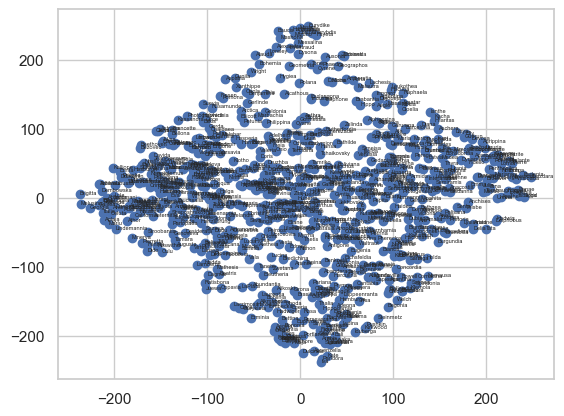

In [15]:
plt.scatter(U[:, 0], U[:, 1])
for i in range(A.shape[0]):
    plt.text(U[i, 0], U[i, 1], A[i, 0], fontsize=4)

On affiche ensuite les deux vecteurs propres correspondant au plan principal.

In [16]:
pca1.components_

array([[ 7.20314500e-04, -7.43384440e-01,  6.68862303e-01,
        -1.50864259e-03, -7.66152262e-06, -1.20810418e-05],
       [-1.35925192e-03,  6.68845048e-01,  7.43379386e-01,
         5.61076371e-03, -3.18036104e-06,  2.49301004e-04]])

- Pour le premier vecteur propre 
    - Le premier vecteur propre compte positivement la magnitude absolue et la longitude du nœud ascendant. De plus, il compte négativement l'argument du périhélie, l'inclinaison, l'excentricité et l'axe sémimajor AU. 
    - La composante suivant ce vecteur correspond donc à la différence de valeur entre la magnitude absolue et l'argument du périhélie ainsi que à la différence de valeur entre la magnitude absolue et l'excentricité.
- Pour le deuxième vecteur propre 
    - Le deuxième vecteur propre compte positivement l'argument du périhélie, la longitude du nœud ascendant, l'inclinaison et l'axe sémimajor AU. De plus, il compte négativement la magnitude absolue et l'excentricité. 
    - La composante suivant ce vecteur correspond donc à la différence de valeur entre l'argument du périhélie et l'excentricité.

On regarde aussi la part d'inertie pour chacun des vecteur propres :

In [17]:
pca_evr = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
pca_evr

0.9978789564528759

In [18]:
print("Au total, la part d'inertie du plan principal est de {}, donc le plan principal est ici une représentation est très proche des données de départ.".format(pca_evr))

Au total, la part d'inertie du plan principal est de 0.9978789564528759, donc le plan principal est ici une représentation est très proche des données de départ.


## Analyse discriminante

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
catego = A[:,3].transpose()
catego = catego.astype(int)

nom = A[:, 0]

LDA = LinearDiscriminantAnalysis(n_components=2)
LDA1 = LDA.fit(A1, catego)
U2 = LDA1.transform(A1)

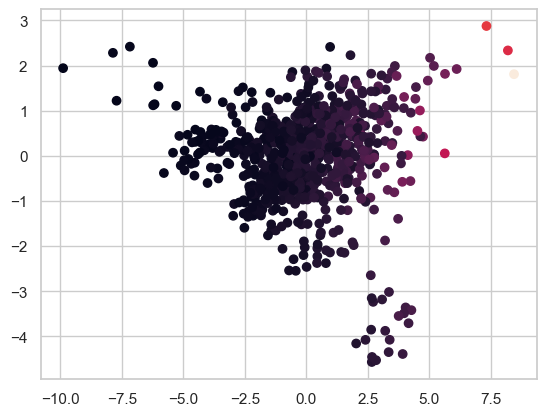

In [21]:
plt.scatter(U2[:, 0], U2[:, 1], c = catego)
# for i in range(A.shape[0]):
#     plt.text(U2[i, 0], U2[i, 1], nom[i], fontsize = 5)

In [22]:
B = np.array(data2)
B1 = B[:,1:]
B1.shape

(1580, 6)

In [23]:
Diameter_astro3 = []
for i in range(B1.shape[0]):
    Diameter_astro3_i = LDA1.predict([np.array(B1[i], dtype=float)])
    Diameter_astro3.append(Diameter_astro3_i[0])

In [24]:
U3 = []
for i in range(B1.shape[0]):
    U3_i = LDA1.transform([np.array(B1[i], dtype=float)])
    U3.append(U3_i)

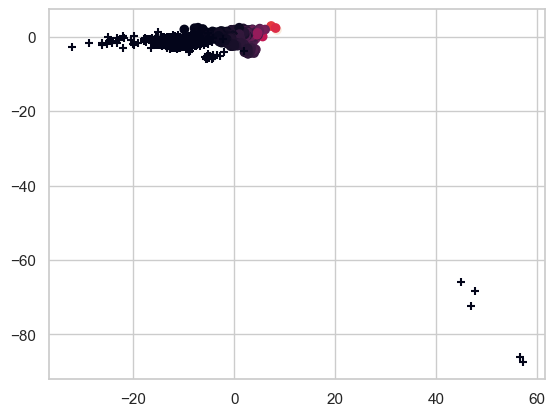

In [25]:
plt.scatter(U2[:, 0], U2[:, 1], c = catego)

for i in range(B1.shape[0]):
    plt.scatter(U3[i][:, 0], U3[i][:, 1], c = Diameter_astro3[i], marker='+')

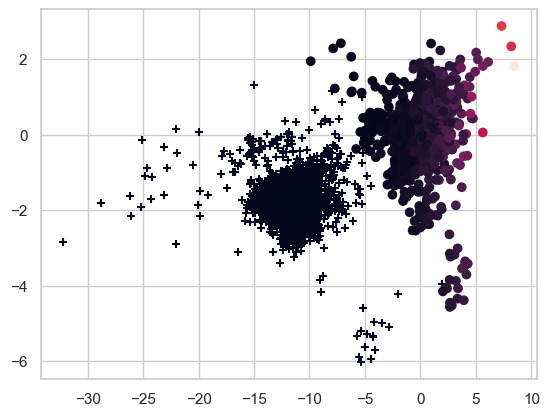

In [26]:
plt.scatter(U2[:, 0], U2[:, 1], c = catego)

U4 = []
U4_Diameter_astro3 = []
for i in range(B1.shape[0]):
    if U3[i][:, 0] < 40:
        plt.scatter(U3[i][:, 0], U3[i][:, 1], c = Diameter_astro3[i], marker='+')
    else:
        U4.append(U3[i])
        U4_Diameter_astro3.append(Diameter_astro3[i])

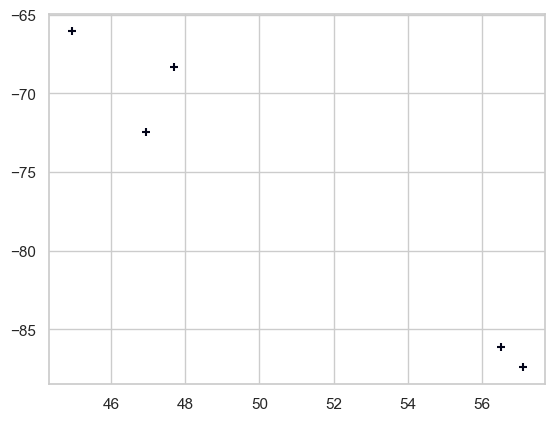

In [27]:
for i in range(len(U4)):
    plt.scatter(U4[i][:, 0], U4[i][:, 1], c = U4_Diameter_astro3[i], marker='+')

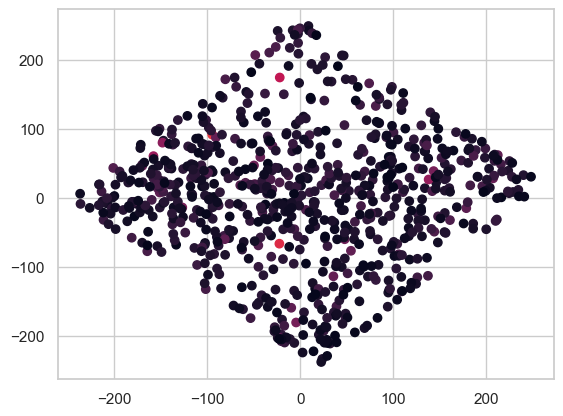

In [28]:
plt.scatter(U[:, 0], U[:, 1], c = catego)

### La qualité de la prévision

In [29]:
Gbrute = [np.mean(A1[catego == i], axis=0) for i in catego]
Gprincipal = [np.mean(U[catego == i], axis=0) for i in catego]
Gdiscriminant = [np.mean(U2[catego == i], axis=0) for i in catego]

In [30]:
def prev_brute(u):
    return np.argmin([np.linalg.norm(u - G) for G in Gbrute]) + 1
def prev_principal(u):
    return np.argmin([np.linalg.norm(u - G) for G in Gprincipal]) + 1
def prev_discriminant(u):
    return np.argmin([np.linalg.norm(u - G) for G in Gdiscriminant]) + 1

In [31]:
N = A1.shape[0]

rsklearn = 0
for i in range(N):
    if LDA1.predict([np.array(A1[i], dtype=float)])[0] != catego[i]:
        rsklearn += 1
rsklearn = rsklearn / N

rbrute = 0
for i in range(N):
    if prev_brute(A1[i]) != catego[i]:
        rbrute += 1
rbrute = rbrute / N

rprincipal = 0
for i in range(N):
    if prev_principal(U[i]) != catego[i]:
        rprincipal += 1
rprincipal = rprincipal / N

rdiscriminant = 0
for i in range(N):
    if prev_discriminant(U2[i, :]) != catego[i]:
        rdiscriminant += 1
rdiscriminant = rdiscriminant / N

rsklearn, rbrute, rprincipal, rdiscriminant

(0.8596938775510204,
 0.9974489795918368,
 0.9987244897959183,
 0.9974489795918368)

In [32]:
LDA1.score(A1, catego)

0.14030612244897958

Ce résultat est très médiocre, parce que la classification est incorrecte. Deuxièmement, LDA est un algorithme de classification et n'est pas adapté à la prédiction de données.

## Forêt aléatoire et régression de la crête

Pour obtenir des résultats plus précis, nous avons étudié des tutoriels sur le web et utilisé deux autres méthodes pour faire des prédictions.

### Semimajor_axis_AU

Mouvement planétaire selon la loi de Kepler suit une trajectoire elliptique comme le rayon dans un cercle ellipse a deux paramètres pour définir sa trajectoire, l'axe semi-majeur et l'axe semi-minor. <br>
<br>
<br>
$\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1  $
<br>
<br>
Où a est le demi-grand axe et b le demi-petit axe.

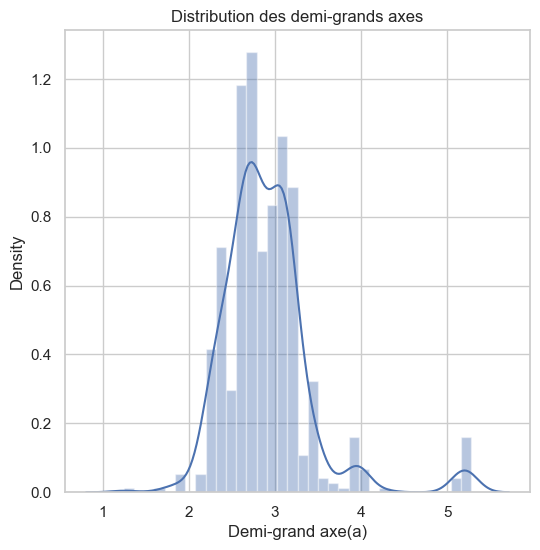

In [33]:
# Visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['Semimajor_axis_AU'])
plt.xlabel("Demi-grand axe(a)")
plt.title("Distribution des demi-grands axes")
plt.show()

Text(0.5, 1.0, "Diagramme en boîte de l'axe semi-majeur")

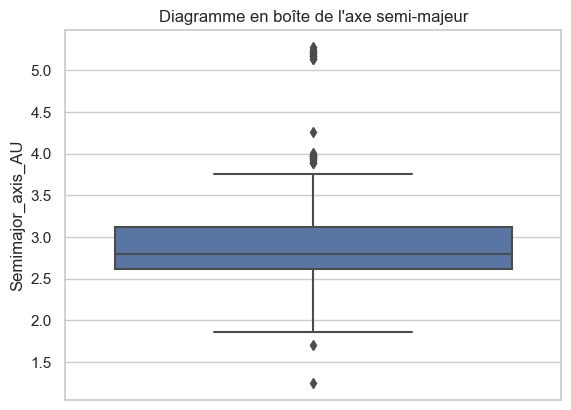

In [34]:
#Tracé d'un diagramme en boîte
sns.boxplot(data=X_train,y=X_train['Semimajor_axis_AU'])
plt.title("Diagramme en boîte de l'axe semi-majeur")

In [35]:
print("la valeur minimale des colonnes du demi-grand axe est {}.".format(min(X_train['Semimajor_axis_AU'])))
print("Le percentile 50 des colonnes de l'axe semi-majeur est {}.".format(np.percentile(X_train['Semimajor_axis_AU'],50)))
print("Le percentile 90 centile des colonnes de l'axe semi-majeur est {}.".format(np.percentile(X_train['Semimajor_axis_AU'],95)))
print("Le percentile 99 des colonnes du demi-grand axe est {}.".format(np.percentile(X_train['Semimajor_axis_AU'],99)))
print("la valeur maximale des colonnes du demi-grand axe est {}.".format(max(X_train['Semimajor_axis_AU'])))

la valeur minimale des colonnes du demi-grand axe est 1.24567285.
Le percentile 50 des colonnes de l'axe semi-majeur est 2.80157204.
Le percentile 90 centile des colonnes de l'axe semi-majeur est 3.8938944859999998.
Le percentile 99 des colonnes du demi-grand axe est 5.2064318452.
la valeur maximale des colonnes du demi-grand axe est 5.27901972.


Text(0.5, 1.0, 'Diagramme de dispersion entre le diamètre des astéroïdes et le demi-grand axe')

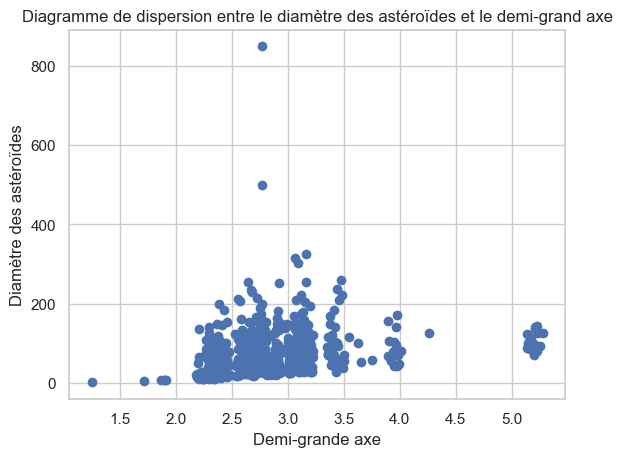

In [36]:
#Vérification de la relation entre l'axe principal du Semi et le diamètre
plt.scatter(X_train['Semimajor_axis_AU'],Y_train)
plt.xlabel("Demi-grande axe")
plt.ylabel("Diamètre des astéroïdes")
plt.title("Diagramme de dispersion entre le diamètre des astéroïdes et le demi-grand axe")

In [37]:
from scipy.stats import spearmanr
coef, p = spearmanr(X_train['Semimajor_axis_AU'], Y_train)
print(coef)

0.29762770079878387


Nous pouvons constater qu'il existe une certaine corrélation avec le diamètre, bien qu'elle ne soit pas linéaire, mais qu'il existe une relation non linéaire.

### Excentricité

Le mouvement planétaire selon la loi de Kepler suit une trajectoire elliptique qui possède un paramètre d'excentricité. L'excentricité d'une ellipse est inférieure à 1. L'excentricité nous aide à déterminer la circularité de l'ellipse par rapport au cercle. <br>
<br>
<br>
$ e= \sqrt{1-\frac{b^2}{a^2}} $
<br>
<br>
Où a est le demi-grand axe et b le demi-petit axe.

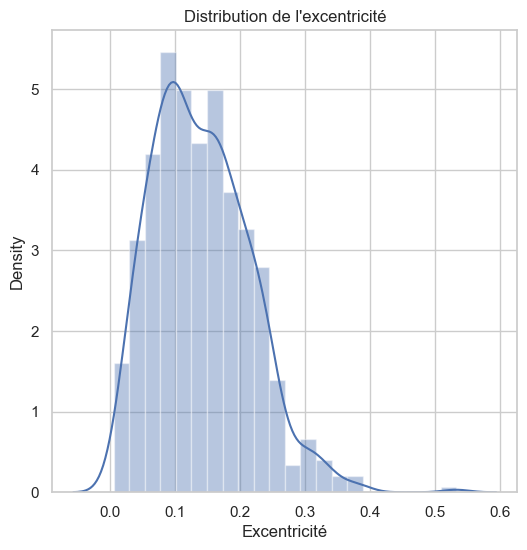

In [38]:
#Checking distribution of eccentricity
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['Eccentricity'])
plt.xlabel("Excentricité")
plt.title("Distribution de l'excentricité")
plt.show()

La distribution de l'excentricité est fortement asymétrique. Elle suit en quelque sorte la distribution normale logarithmique, vérifions-le.

In [39]:
e_log=np.log(X_train['Eccentricity'])

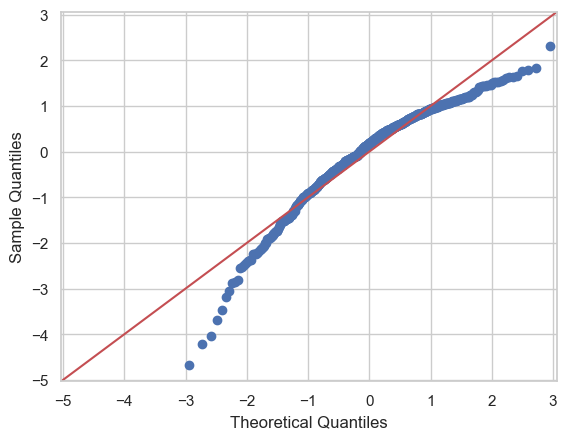

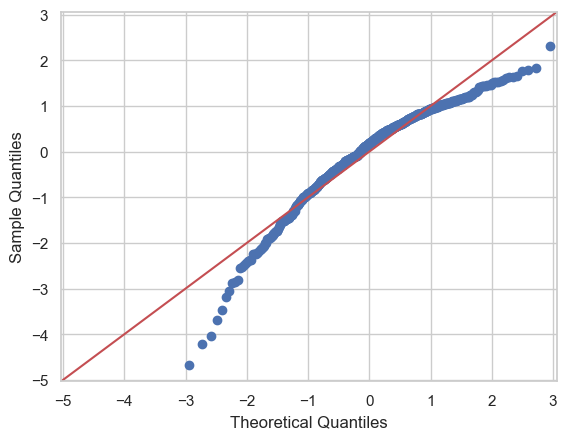

In [40]:
sm.qqplot(e_log,line='45',fit=True,dist=stats.norm)

Nous pouvons voir qu'il y a beaucoup de déviations par rapport à la ligne droite et qu'elle ne suit donc pas la distribution log-normale.

Text(0.5, 1.0, "Diagramme en boîte de l'excentricité")

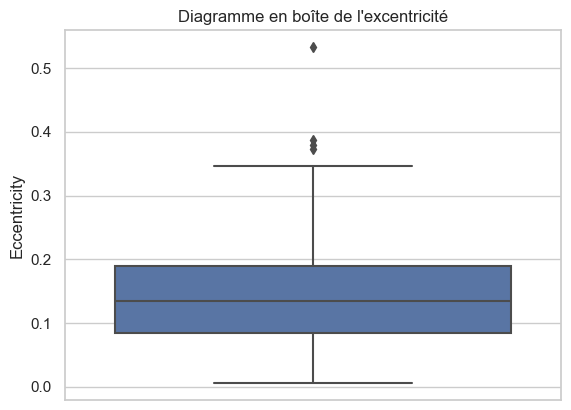

In [41]:
sns.boxplot(data=X_train,y=X_train['Eccentricity'])
plt.title("Diagramme en boîte de l'excentricité")

In [42]:
print("La valeur minimale des colonnes d'excentricité est {}.".format(min(X_train['Eccentricity'])))
print("Le percentile 50 de la colonne d'excentricité est {}.".format(np.percentile(X_train['Eccentricity'],50)))
print("Le percentile 95 de la colonne d'excentricité est {}.".format(np.percentile(X_train['Eccentricity'],95)))
print("Le percentile 99 de la colonne d'excentricité est {}.".format(np.percentile(X_train['Eccentricity'],99)))
print("La valeur maximale de la colonne d'excentricité est {}.".format(max(X_train['Eccentricity'])))

La valeur minimale des colonnes d'excentricité est 0.00563589.
Le percentile 50 de la colonne d'excentricité est 0.13404945.
Le percentile 95 de la colonne d'excentricité est 0.2611246479999997.
Le percentile 99 de la colonne d'excentricité est 0.3397974610000001.
La valeur maximale de la colonne d'excentricité est 0.53301627.


La distribution de l'excentricité semble ressembler à une distribution log-normale bien que ce ne soit pas le cas, ce que nous avons confirmé en utilisant le graphique Q-Q. Elle comporte quelques points aberrants qui peuvent être confirmés par la différence entre le percentile 99 et la valeur maximale.

Text(0.5, 1.0, "Diagramme de dispersion entre l'excentricité et le diamètre de l'astéroïde")

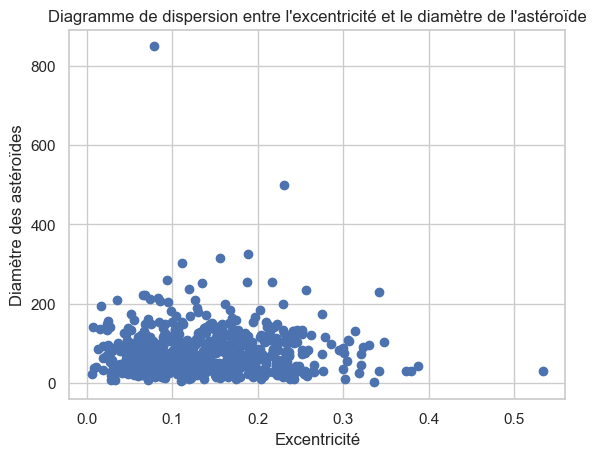

In [43]:
#Vérification de la relation entre l'excentricité et le diamètre des astéroïdes 
plt.scatter(X_train['Eccentricity'],Y_train)
plt.xlabel("Excentricité")
plt.ylabel("Diamètre des astéroïdes")
plt.title("Diagramme de dispersion entre l'excentricité et le diamètre de l'astéroïde")

In [44]:
coef, p = spearmanr(X_train['Eccentricity'], Y_train)
print(coef)

0.05505336902193094


La corrélation entre l'excentricité et le diamètre est très faible et négative. Nous pouvons également observer des valeurs aberrantes que nous analyserons ultérieurement.

### i- Inclination with respect to x-y elliptical plane

Tous les astéroïdes et leurs parents suivent une orbite elliptique conformément à la première loi de Kepler sur le mouvement des planètes. Nous avons adopté comme plan de référence le plan dans lequel la terre se déplace autour du soleil. i est l'inclinaison du plan elliptique de l'astéroïde par rapport au plan elliptique dans lequel la terre tourne autour du soleil.
Référence :- https://astronomy.swin.edu.au/cosmos/O/orbital+inclination

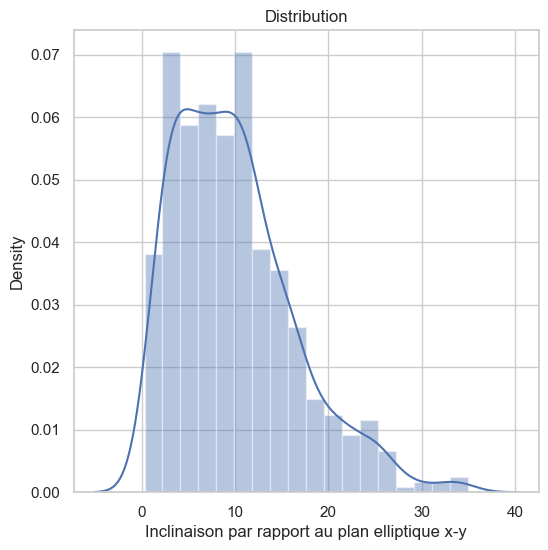

In [45]:
#Vérifier la distribution
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['Inclination'])
plt.xlabel("Inclinaison par rapport au plan elliptique x-y")
plt.title("Distribution")
plt.show()

Text(0.5, 1.0, "CDF de l'inclinaison par rapport au plan elliptique x-y ")

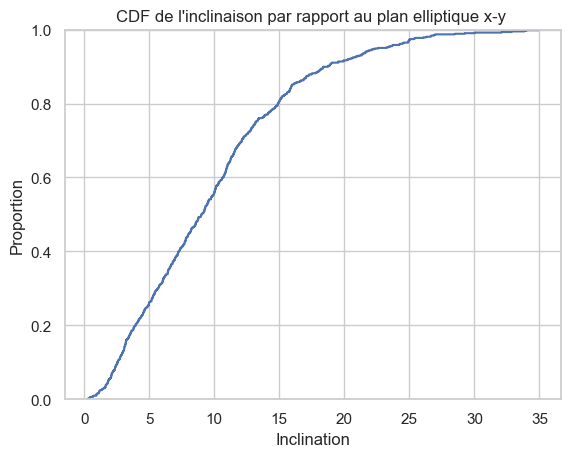

In [46]:
sns.ecdfplot(data=X_train,x=X_train['Inclination'])
plt.title("CDF de l'inclinaison par rapport au plan elliptique x-y ")

In [47]:
print("La valeur minimale de l'inclinaison est {}.".format(min(X_train['Inclination'])))
print("Le percentile 50 de l'inclinaison est {}.".format(np.percentile(X_train['Inclination'], 50))) 
print("Le percentile 95 de l'inclinaison est {}.".format(np.percentile(X_train['Inclination'], 90))) 
print("Le percentile 99 de l'inclinaison est {}".format(np.percentile(X_train['Inclination'], 99))) 
print("La valeur maximale de l'inclinaison est {}.".format(max(X_train['Inclination']))) 

La valeur minimale de l'inclinaison est 0.264567.
Le percentile 50 de l'inclinaison est 9.036367.
Le percentile 95 de l'inclinaison est 18.51468299999999.
Le percentile 99 de l'inclinaison est 29.05829642000001
La valeur maximale de l'inclinaison est 34.92695.


Ici, l'inclinaison par rapport au plan x-y est positivement asymétrique et 99 % des données sont comprises entre 0 et 29, ce qui signifie qu'il n'y a pas beaucoup d'inclinaison par rapport au plan x-y pour 99 % des astéroïdes, seuls certains astéroïdes ont une inclinaison très élevée.

Text(0.5, 1.0, "Diagramme de dispersion entre l'inclinaison et le diamètre de l'astéroïde")

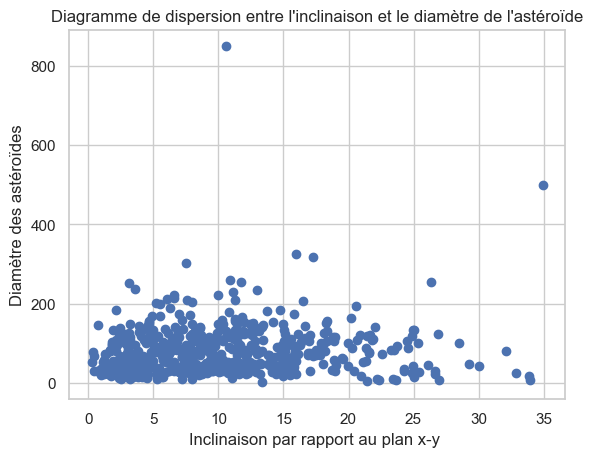

In [48]:
plt.scatter(X_train['Inclination'],Y_train)
plt.xlabel("Inclinaison par rapport au plan x-y ")
plt.ylabel("Diamètre des astéroïdes")
plt.title("Diagramme de dispersion entre l'inclinaison et le diamètre de l'astéroïde")

In [49]:
coef, p = spearmanr(X_train['Inclination'], Y_train)
print(coef)

0.12308029608569947


La corrélation entre l'inclinaison par rapport au plan x-y et le diamètre de l'astéroïde est très faible.

### Longitude_of_ascending_node

La longitude du nœud ascendant (☊ ou Ω) est l'un des éléments orbitaux utilisés pour spécifier l'orbite d'un objet dans l'espace. Il s'agit de l'angle entre une direction de référence spécifiée, appelée origine de la longitude, et la direction du nœud ascendant, mesuré dans un plan de référence spécifié.
Référence :- https://en.wikipedia.org/wiki/Longitude_of_the_ascending_node

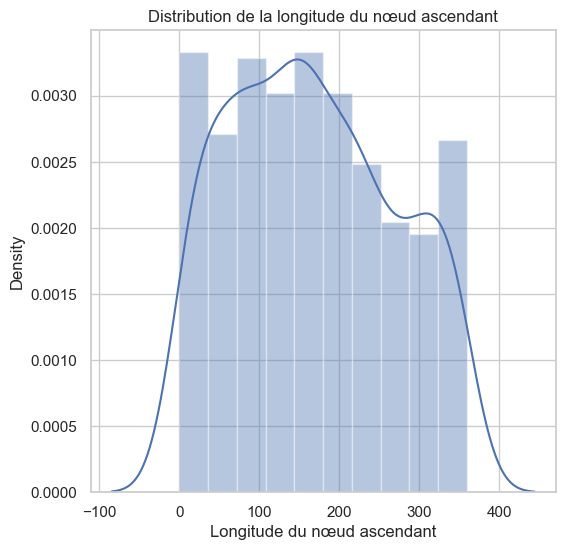

In [50]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['Longitude_of_ascending_node'])
plt.xlabel("Longitude du nœud ascendant")
plt.title("Distribution de la longitude du nœud ascendant")
plt.show()

In [51]:
print("La valeur minimale de la longitude du nœud ascendant est {}.".format(min(X_train['Longitude_of_ascending_node'])))
print("Le percentile 50 de la longitude du nœud ascendant est {}.".format(np.percentile(X_train['Longitude_of_ascending_node'], 50))) 
print("Le percentile 95 de la longitude du nœud ascendant est {}.".format(np.percentile(X_train['Longitude_of_ascending_node'], 90))) 
print("Le percentile 99 de la longitude du nœud ascendant est {}.".format(np.percentile(X_train['Longitude_of_ascending_node'], 99))) 
print("La valeur maximale de la longitude du nœud ascendant est {}.".format(max(X_train['Longitude_of_ascending_node']))) 

La valeur minimale de la longitude du nœud ascendant est 0.050713.
Le percentile 50 de la longitude du nœud ascendant est 158.467352.
Le percentile 95 de la longitude du nœud ascendant est 319.3380514.
Le percentile 99 de la longitude du nœud ascendant est 355.81494046.
La valeur maximale de la longitude du nœud ascendant est 359.321992.


La longitude du nœud ascendant est une sorte de distribution uniforme, pas correctement, mais en quelque sorte. Il n'y a pratiquement pas de valeurs aberrantes dans cette colonne.

Text(0.5, 1.0, "Diagramme de dispersion entre le nœud ascendant et le diamètre de l'astéroïde")

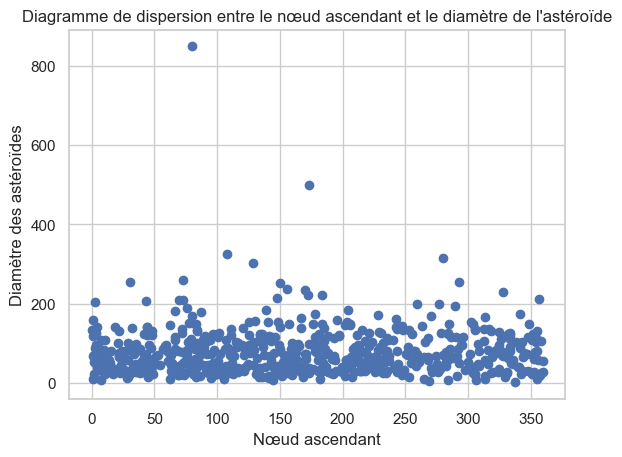

In [52]:
#Vérification de la relation entre le nœud ascendant et le diamètre
plt.scatter(X_train['Longitude_of_ascending_node'],Y_train)
plt.xlabel("Nœud ascendant")
plt.ylabel("Diamètre des astéroïdes")
plt.title("Diagramme de dispersion entre le nœud ascendant et le diamètre de l'astéroïde")

In [53]:
coef, p = spearmanr(X_train['Longitude_of_ascending_node'], Y_train)
print(coef)

0.03303125221592468


Il n'y a pratiquement aucune corrélation entre le nœud ascendant et le diamètre des astéroïdes.

### Argument_of_perihelion

Le périhélie est le point d'approche le plus proche entre le corps en orbite (les astéroïdes dans ce cas) et le foyer. Si l'on fait tourner l'axe de l'orbite autour du foyer, l'angle de rotation est l'argument du périhélie. Si l'on fait tourner l'axe de l'orbite autour du foyer, l'angle de rotation est l'argument du périhélie (ω).<br>
<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/ellipticalorbit.1.jpg"><br>
<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/argumentofperihelion.jpg"><br>
Reference :- https://astronomy.swin.edu.au/cosmos/a/argument+of+perihelion

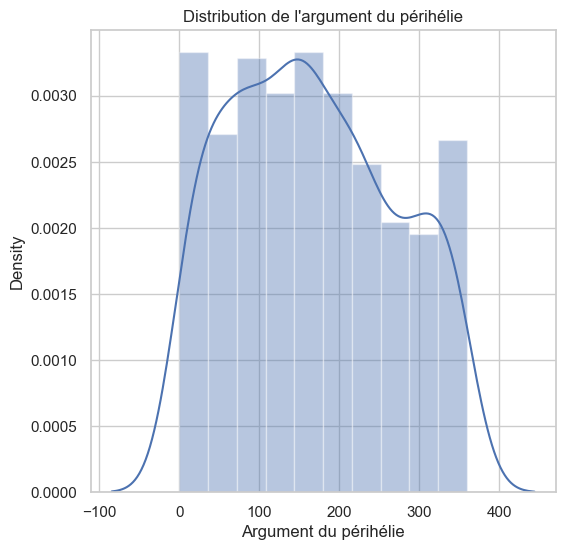

In [54]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['Longitude_of_ascending_node'])
plt.xlabel("Argument du périhélie")
plt.title("Distribution de l'argument du périhélie")
plt.show()

In [55]:
print("La valeur minimale de l'argument du périhélie est {}.".format(min(X_train['Longitude_of_ascending_node']))) 
print("Le percentile 50 de l'inclinaison est {}.".format(np.percentile(X_train['Longitude_of_ascending_node'], 50))) 
print("Le percentile 95 de l'inclinaison est {}.".format(np.percentile(X_train['Longitude_of_ascending_node'], 90))) 
print("Le percentile 99 de l'inclinaison est {}.".format(np.percentile(X_train['Longitude_of_ascending_node'], 99))) 
print("La valeur maximale de l'argument du périhélie est {}".format(max(X_train['Longitude_of_ascending_node']))) 



La valeur minimale de l'argument du périhélie est 0.050713.
Le percentile 50 de l'inclinaison est 158.467352.
Le percentile 95 de l'inclinaison est 319.3380514.
Le percentile 99 de l'inclinaison est 355.81494046.
La valeur maximale de l'argument du périhélie est 359.321992


La distribution de l'argument du périhélie est en quelque sorte uniforme. Il n'y a pratiquement pas de valeurs aberrantes

Text(0.5, 1.0, "Diagramme de dispersion entre l'argument du périhélie et le diamètre de l'astéroïde")

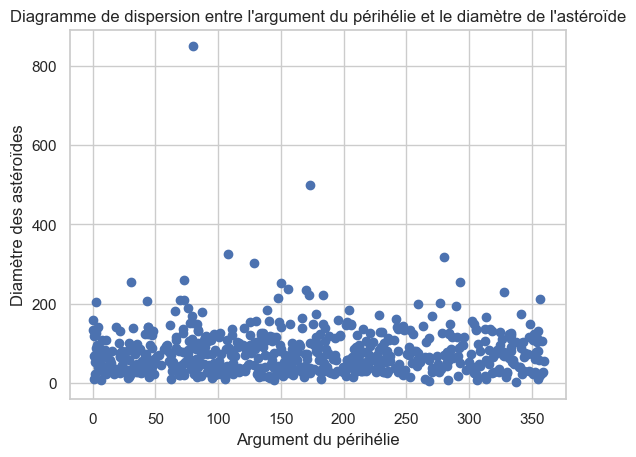

In [56]:
plt.scatter(X_train['Longitude_of_ascending_node'],Y_train)
plt.xlabel("Argument du périhélie")
plt.ylabel("Diamètre des astéroïdes")
plt.title("Diagramme de dispersion entre l'argument du périhélie et le diamètre de l'astéroïde")

In [57]:
coef, p = spearmanr(X_train['Longitude_of_ascending_node'], Y_train)
print(coef)

0.03303125221592468


Il n'y a pratiquement aucune corrélation entre l'argument du périhélie et le diamètre de l'astéroïde.

### Absolute_magnitude

La magnitude absolue, communément appelée H, est définie comme la magnitude apparente que l'objet aurait s'il se trouvait à une unité astronomique (UA) du Soleil et de l'observateur, et dans des conditions d'opposition solaire idéale (une disposition impossible en pratique).

In [58]:
print("Le nombre de valeurs manquantes dans la colonne des paramètres de magnitude absolue dans l'ensemble de données d'apprentissage est {}.".format(X_train['Absolute_magnitude'].isnull().sum()))
print("Le nombre de valeurs manquantes dans la colonne des paramètres de magnitude absolue de l'ensemble de données de test est {}.".format(X_test['Absolute_magnitude'].isnull().sum()))

Le nombre de valeurs manquantes dans la colonne des paramètres de magnitude absolue dans l'ensemble de données d'apprentissage est 0.
Le nombre de valeurs manquantes dans la colonne des paramètres de magnitude absolue de l'ensemble de données de test est 0.


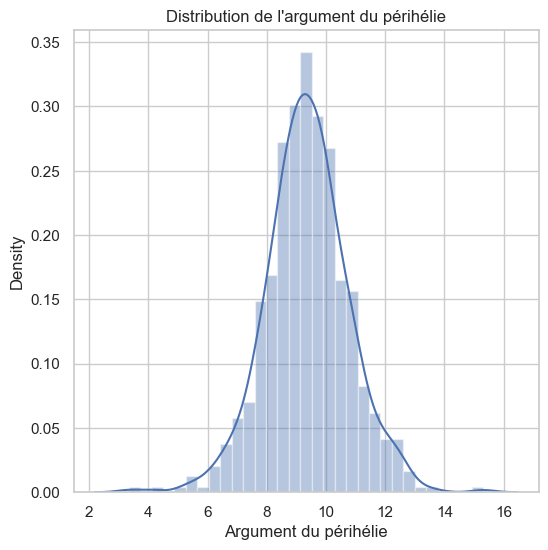

In [59]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['Absolute_magnitude'])
plt.xlabel("Argument du périhélie")
plt.title("Distribution de l'argument du périhélie")
plt.show()

In [60]:
print("La valeur minimale du magnitude absolue est {}.".format(min(X_train['Absolute_magnitude'])))
print("Le percentile 50 du paramètre de magnitude absolue est {}.".format(np.percentile(X_train['Absolute_magnitude'], 50))) 
print("Le percentile 95 du paramètre de magnitude absolue est {}.".format(np.percentile(X_train['Absolute_magnitude'], 90))) 
print("Le percentile 99 du paramètre de magnitude absolue est {}.".format(np.percentile(X_train['Absolute_magnitude'], 99)))
print("La valeur maximale du magnitude absolue est {}.".format(max(X_train['Absolute_magnitude'])))

La valeur minimale du magnitude absolue est 3.33.
Le percentile 50 du paramètre de magnitude absolue est 9.34.
Le percentile 95 du paramètre de magnitude absolue est 11.011999999999999.
Le percentile 99 du paramètre de magnitude absolue est 12.6584.
La valeur maximale du magnitude absolue est 15.32.


Text(0.5, 1.0, "Diagramme de dispersion entre l'argument du périhélie et le diamètre de l'astéroïde")

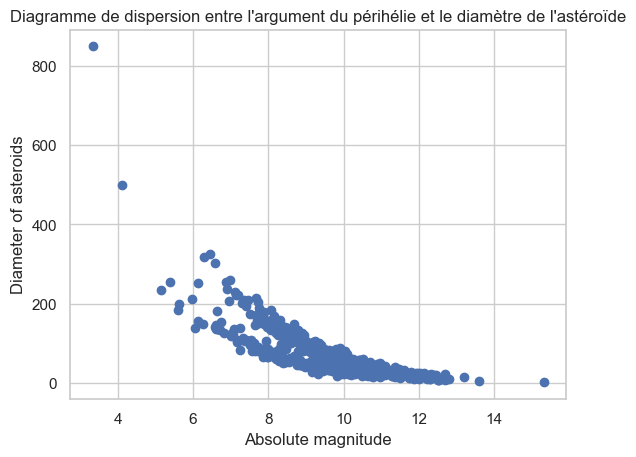

In [61]:
plt.scatter(X_train['Absolute_magnitude'],Y_train)
plt.xlabel("Absolute magnitude")
plt.ylabel("Diameter of asteroids")
plt.title("Diagramme de dispersion entre l'argument du périhélie et le diamètre de l'astéroïde")

In [62]:
coef, p = spearmanr(X_train['Absolute_magnitude'], Y_train)
print(coef)

-0.8446652037769558


<h3> Ingénierie des fonctionnalités

J'ai trouvé une formule intéressante sur l'un des sites web de la NASA (https://cneos.jpl.nasa.gov/tools/ast_size_est.html) pour déterminer le diamètre d'un astéroïde en utilisant la magnitude absolue (H) et l'albédo géométrique (a). <br>
$d = 10^{[ 3.1236 - 0.5 log10(a) - 0.2H ]}$

<h3> Carte thermique des corrélations

<AxesSubplot:>

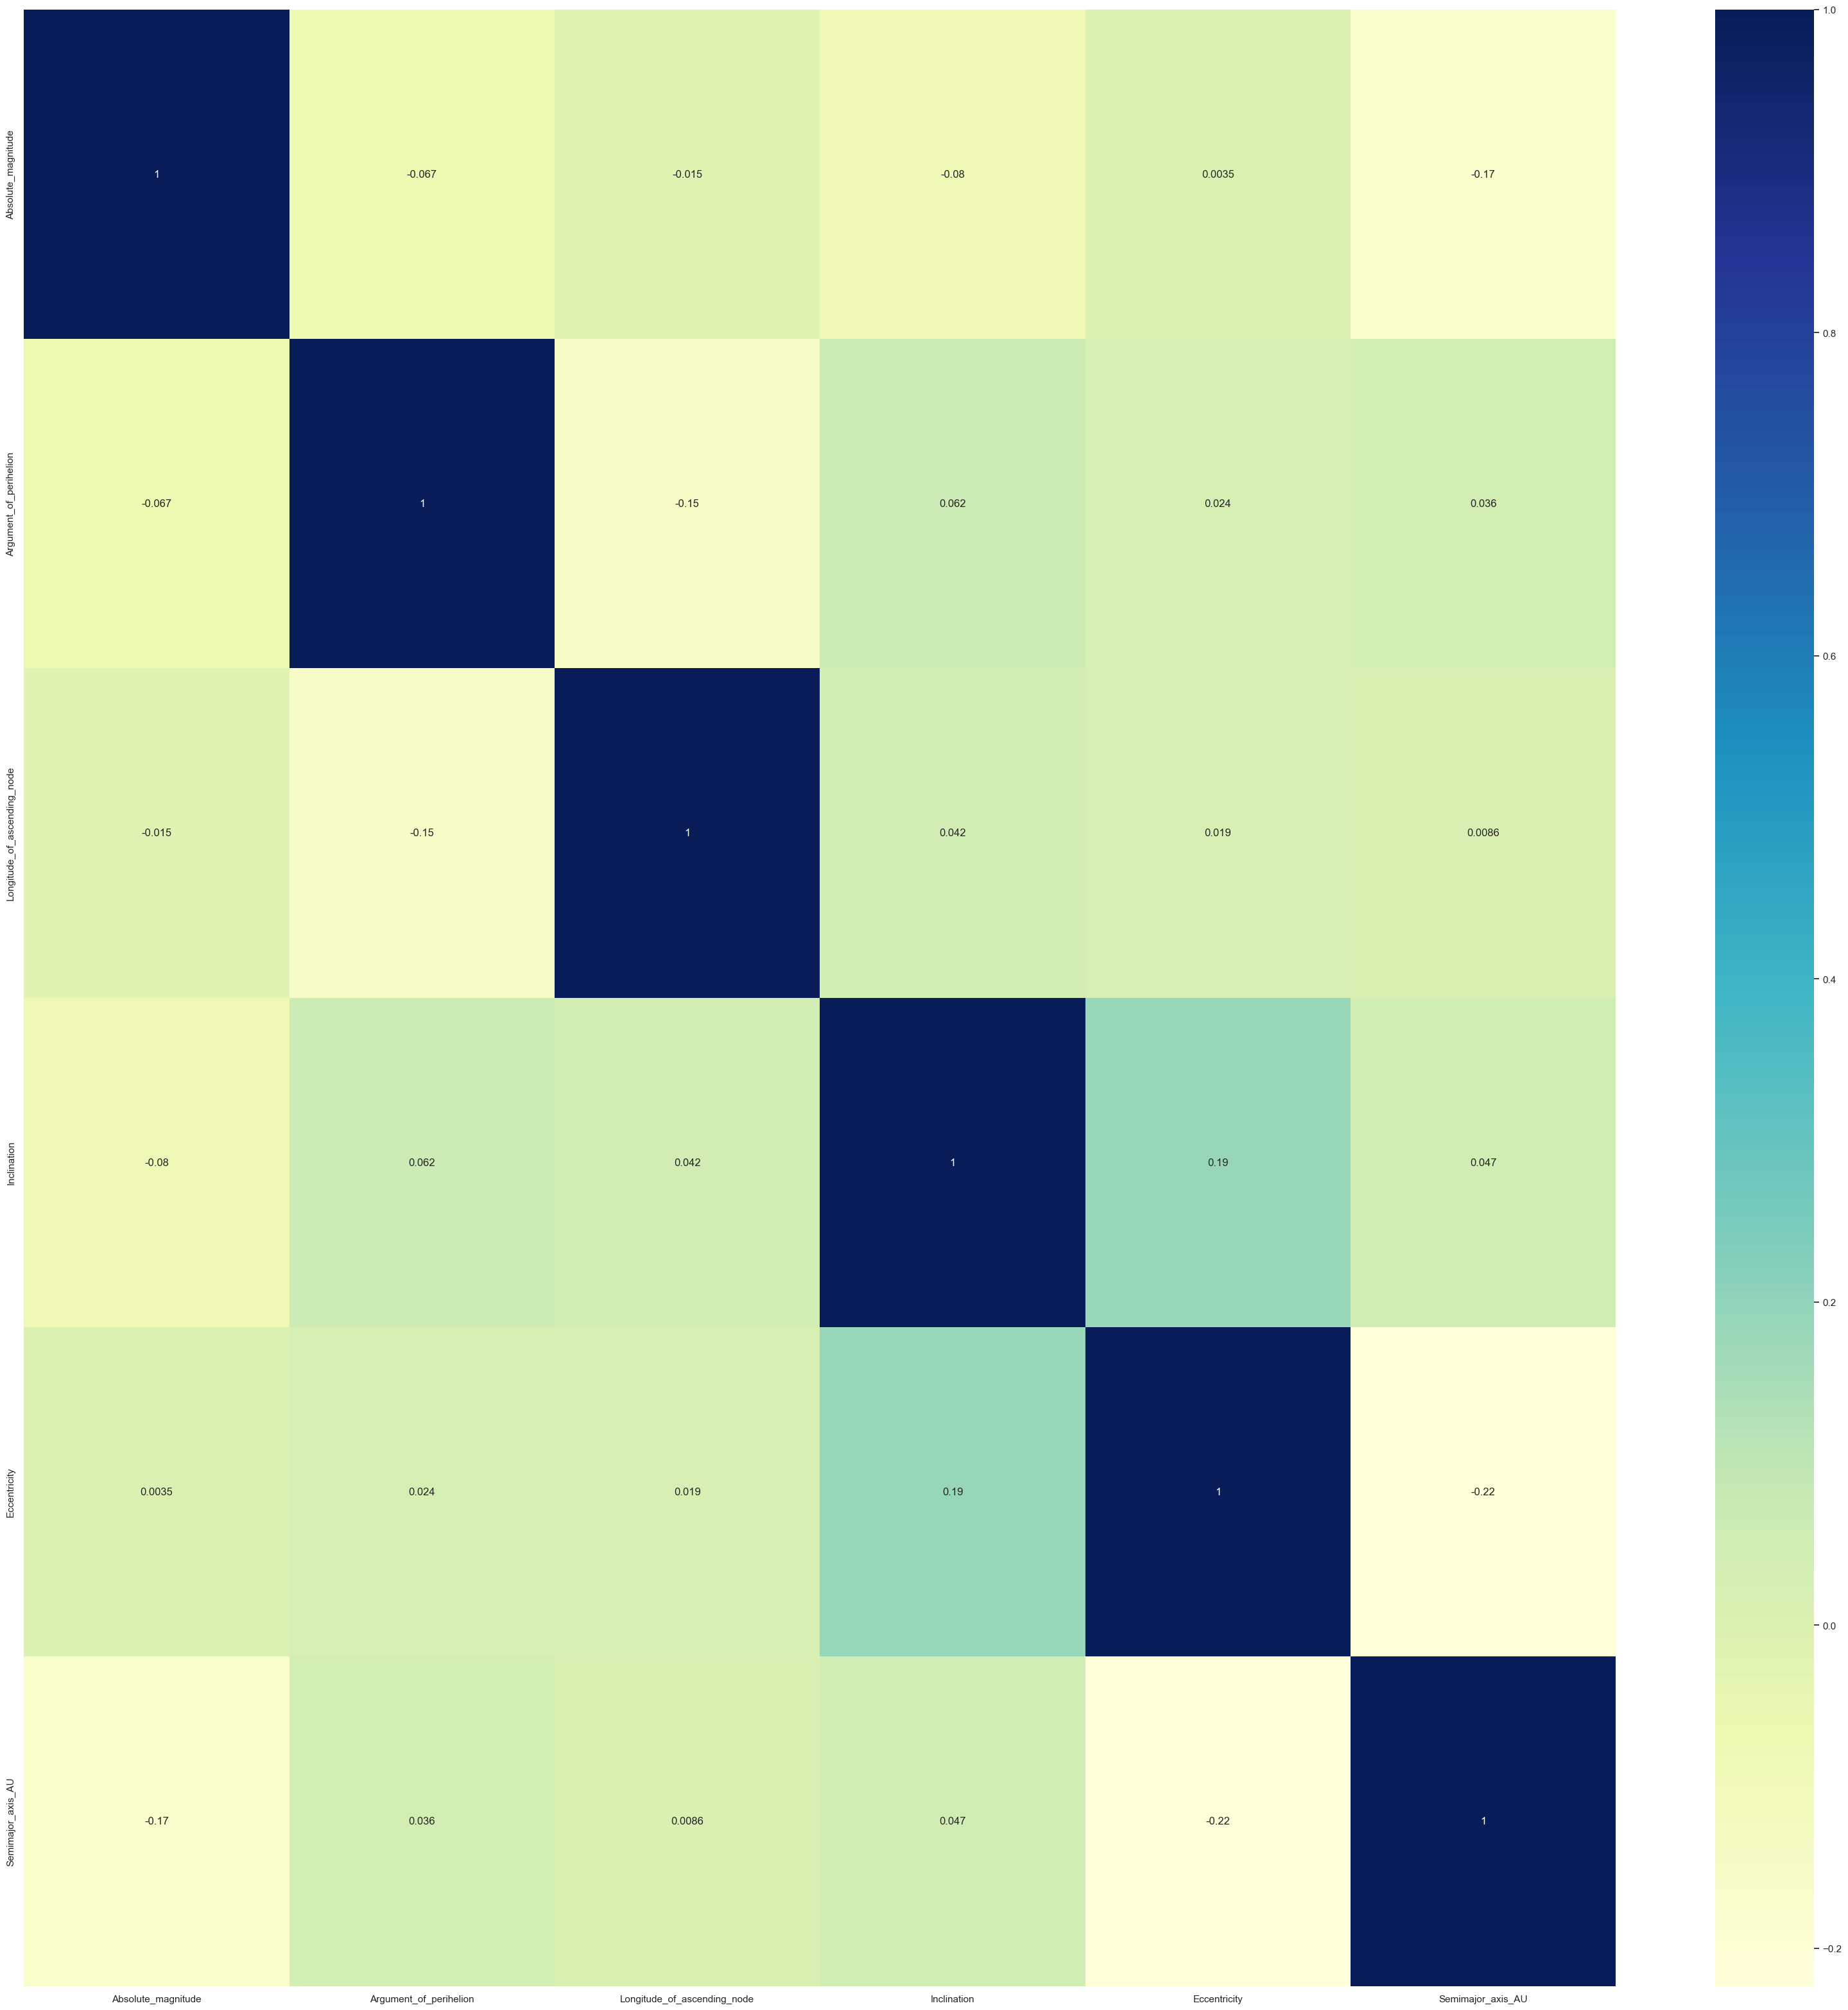

In [63]:
plt.figure(figsize=(40,40))
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

Il s'agit d'une carte thermique de corrélation. La couleur bleu foncé indique une très forte corrélation entre les caractéristiques. Si nous parlons d'un nombre proche de 1, cela indique une très forte corrélation. Il semble y avoir très peu de corrélation entre les caractéristiques d'entrée.

<h3> Normaliser les colonnes numériques

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_numerical=X_train.copy()
X_test_numerical=X_test.copy()

In [65]:
#Sauvegarde du nom de la colonne pour un usage ultérieur
train_column=list(X_train_numerical.columns)
test_column=list(X_test_numerical.columns)

In [66]:
scaler = StandardScaler()
X_train_numerical=scaler.fit_transform(X_train_numerical)
X_test_numerical=scaler.transform(X_test_numerical)

In [67]:
#Sauvegarde de l'échelle standard pour notre point d'interrogation 
from joblib import dump
dump(scaler, 'final_standardscaler.joblib')

['final_standardscaler.joblib']

In [68]:
#Combinaison de transformations numériques et catégorielles 
X_train=pd.DataFrame(X_train_numerical)
X_test=pd.DataFrame(X_test_numerical)

In [69]:
X_train.columns=train_column
X_test.columns=test_column

In [70]:
print(train_column)

['Absolute_magnitude', 'Argument_of_perihelion', 'Longitude_of_ascending_node', 'Inclination', 'Eccentricity', 'Semimajor_axis_AU']


<h3> MODÈLES D'APPRENTISSAGE AUTOMATIQUE

In [71]:
def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(y_test,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(y_test,prediction, c='orange',label='predictions')
    ax2.plot(y_test,y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated radius')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale

<h3> MODÈLE ALÉATOIRE

In [72]:
#Je vais construire un modèle aléatoire que je considère comme un modèle de base - tous les autres modèles sophistiqués doivent être plus performants que ce modèle aléatoire. 
#Je construirai un modèle aléatoire où y_pred sera uniquement la moyenne de y_actual
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
mean_y_train=np.mean(Y_train['Diameter_km'])
y_train_pred=np.full((1,X_train.shape[0]),mean_y_train)[0]
y_train=Y_train['Diameter_km'].values
print("L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle aléatoire est {}.".format(mean_squared_error(y_train,y_train_pred)))
print("Le score R2 pour l'ensemble de données d'apprentissage pour le modèle aléatoire est {}.".format(r2_score(y_train,y_train_pred)))

L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle aléatoire est 3800.704967275372.
Le score R2 pour l'ensemble de données d'apprentissage pour le modèle aléatoire est 4.440892098500626e-16.


In [73]:
y_test_pred=np.full((1,X_test.shape[0]),mean_y_train)[0]
y_test=Y_test['Diameter_km'].values
print("L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle aléatoire est {}.".format(mean_squared_error(y_test,y_test_pred)))
print("Le score R2 pour l'ensemble de données d'apprentissage pour le modèle aléatoire est {}.".format(r2_score(y_test,y_test_pred)))

L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle aléatoire est 3790.4557771450295.
Le score R2 pour l'ensemble de données d'apprentissage pour le modèle aléatoire est -0.000429639345852717.


### Régression linéaire avec régularisation L2 (Ridge Regression)

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Recherche de grille pour trouver le meilleur coefficient pour la régularisation
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Les meilleures valeurs de paramètres sont {}".format(clf.best_params_))

Les meilleures valeurs de paramètres sont {'alpha': 100}


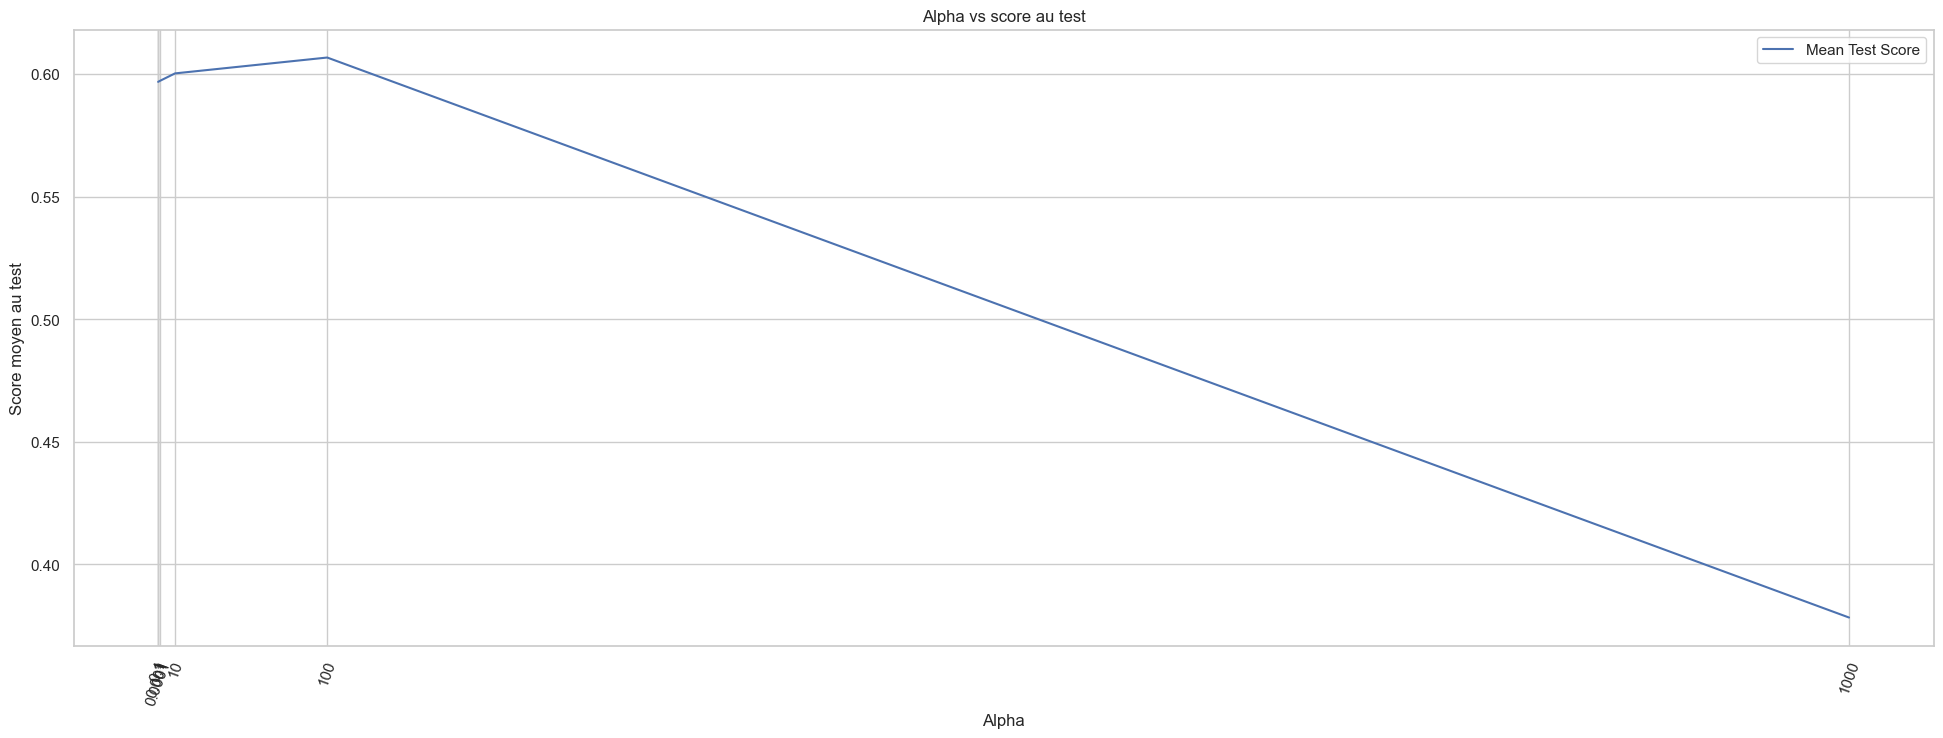

In [75]:
#Alpha vs score au test 
test_score=[]
plt.figure(figsize=(24,8))
test_score.extend(list(clf.cv_results_['mean_test_score']))
alpha=[0.0001,0.001,0.1,1,10,100,1000]
plt.plot(alpha,test_score,label='Mean Test Score')
labels=['0.0001','0.001','0.1','1','10','100','1000']
plt.xticks(alpha, labels, rotation =70)
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Score moyen au test")
plt.title("Alpha vs score au test")
plt.show()

In [76]:
#Ajustons maintenant un modèle avec les meilleurs paramètres
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)
y_train_pred=rid.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle de régression linéaire est {}.".format(mean_absolute_error(y_train,y_train_pred)))
print("R2 score for training dataset for linear regression model is {}.".format(r2_score(y_train,y_train_pred)))

L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle de régression linéaire est 24.05097170044924.
R2 score for training dataset for linear regression model is 0.5867885146204581.


In [77]:
y_test_pred=rid.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("L'erreur absolue moyenne pour l'ensemble de données de test pour le modèle de régression linéaire est {}.".format(mean_absolute_error(y_test,y_test_pred)))
print("Le score R2 pour l'ensemble de données de test pour le modèle de régression linéaire est {}.".format(r2_score(y_test,y_test_pred)))

L'erreur absolue moyenne pour l'ensemble de données de test pour le modèle de régression linéaire est 26.36044439036545.
Le score R2 pour l'ensemble de données de test pour le modèle de régression linéaire est 0.6171004943853404.


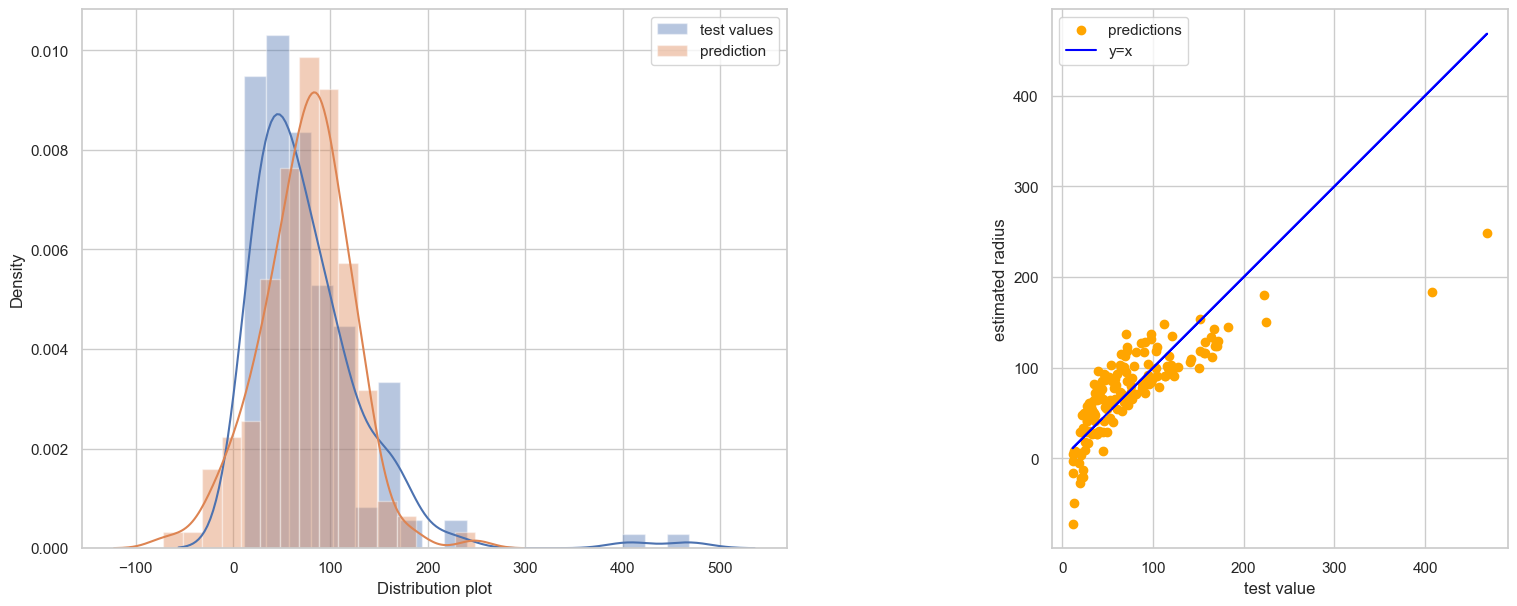

In [78]:
plot(y_test_pred)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Longitude_of_ascending_node'),
  Text(1, 0, 'Argument_of_perihelion'),
  Text(2, 0, 'Eccentricity'),
  Text(3, 0, 'Inclination'),
  Text(4, 0, 'Semimajor_axis_AU'),
  Text(5, 0, 'Absolute_magnitude')])

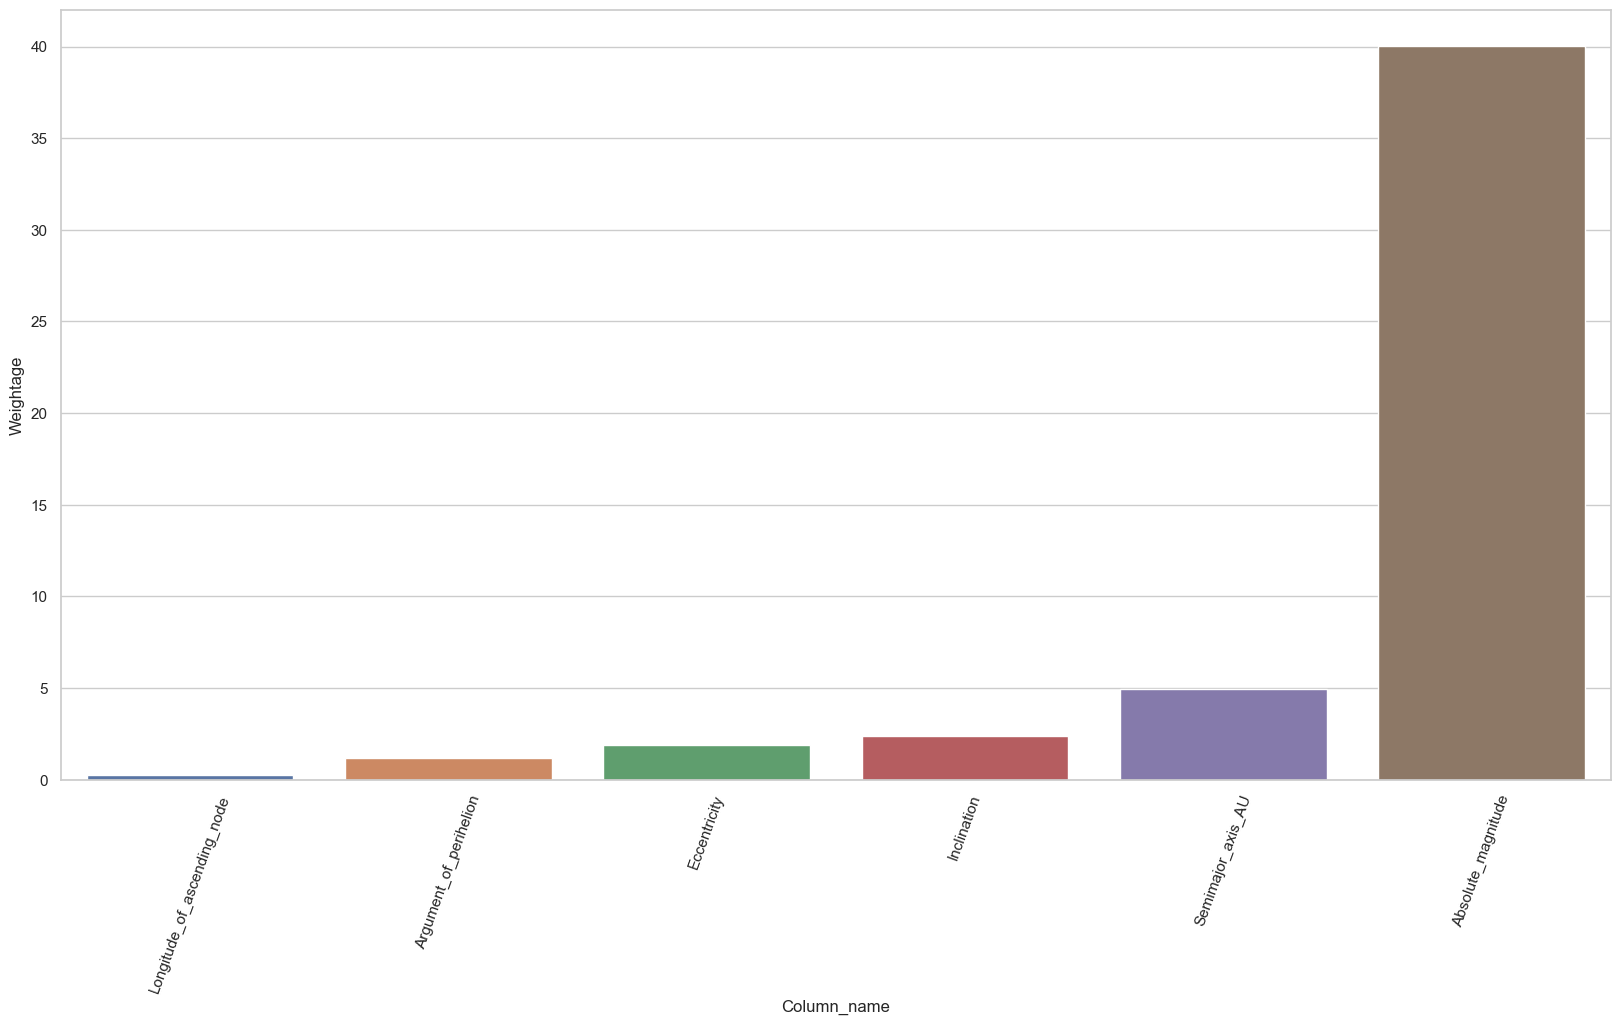

In [79]:
column_name=X_train.columns
coef=abs(rid.coef_[0])
plt.figure(figsize=(20,10))
temp_dict={'Column_name':[],'Weightage':[]}
temp_dict['Column_name'].extend(column_name)
temp_dict['Weightage'].extend(list(coef))
temp_df=pd.DataFrame(temp_dict)
temp_df=temp_df.sort_values(by='Weightage')
sns.barplot(data=temp_df,x='Column_name',y='Weightage')
plt.xticks(rotation=70)

L'estimation du diamètre s'avère être la meilleure fonction pour prédire le diamètre des astéroïdes. C'est pourquoi il est très important de trouver une fonctionnalité à l'aide de la connaissance du domaine.

<h3> K-Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsRegressor
#Recherche de grille pour trouver la meilleure valeur du nombre de voisins les plus proches
parameters={'n_neighbors':[5,10,20,30,50,100]}
knn=KNeighborsRegressor()
clf=GridSearchCV(knn,parameters)
clf.fit(X_train.values,Y_train.values)
print("Les meilleures valeurs de paramètres sont {}.".format(clf.best_params_))

Les meilleures valeurs de paramètres sont {'n_neighbors': 10}.


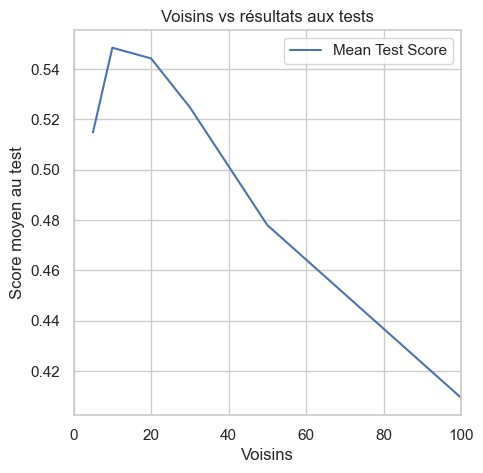

In [81]:
#Voisins vs résultats aux tests 
test_score=[]
plt.figure(figsize=(5,5))
test_score.extend(list(clf.cv_results_['mean_test_score']))
neighbors=[5,10,20,30,50,100]
plt.plot(neighbors,test_score,label='Mean Test Score')
labels=['5','10','20','30','50','100']
plt.legend()
plt.xlabel("Voisins")
plt.ylabel("Score moyen au test")
plt.xlim([0,100])
plt.title("Voisins vs résultats aux tests")
plt.show()

In [82]:
#Now let's fit a model with best parameters
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.values,Y_train.values)
y_train_pred=knn.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle knn est {}.".format(mean_absolute_error(y_train,y_train_pred)))
print("Le score R2 pour l'ensemble de données d'entraînement pour le modèle knn est {}.".format(r2_score(y_train,y_train_pred)))

L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle knn est 20.549537480063798.
Le score R2 pour l'ensemble de données d'entraînement pour le modèle knn est 0.6561792711077248.


In [83]:
y_test_pred=knn.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("L'erreur absolue moyenne pour l'ensemble de données de test pour le modèle knn est {}.".format(mean_absolute_error(y_test,y_test_pred)))
print("Le score R2 pour l'ensemble de données de test pour le modèle knn est {}.".format(r2_score(y_test,y_test_pred)))

L'erreur absolue moyenne pour l'ensemble de données de test pour le modèle knn est 24.940891719745224.
Le score R2 pour l'ensemble de données de test pour le modèle knn est 0.6697403845048235.


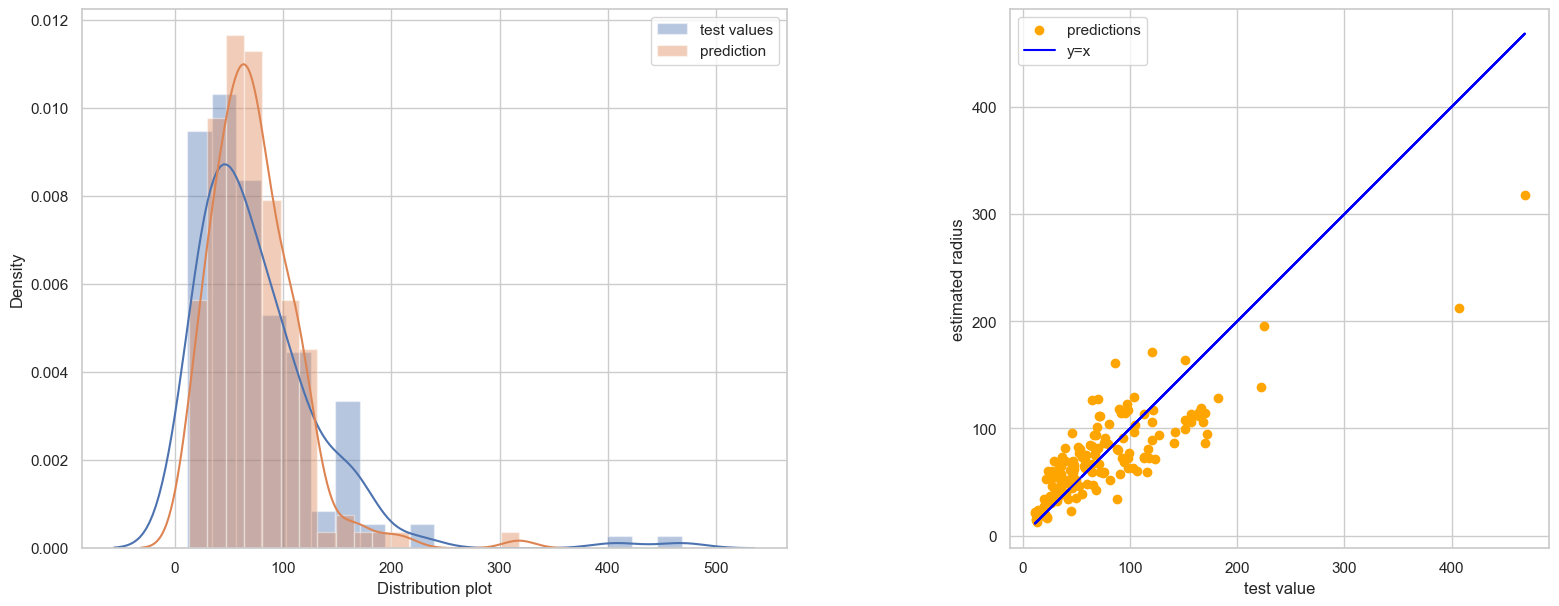

In [84]:
plot(y_test_pred)

<h3> FORÊT ALÉATOIRE

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
#Recherche en grille pour trouver la meilleure valeur du nombre d'arbres, min_split et min_samples_leaf
parameters={'n_estimators':[10,20,20,40,50], 'min_samples_split':[2,5,10,15,20] , 'min_samples_leaf' :[1,5,10,15,20]}
rff=RandomForestRegressor()
clf=RandomizedSearchCV(rff,parameters)
clf.fit(X_train.values,Y_train.values)
print("Les meilleures valeurs de paramètres sont {}.".format(clf.best_params_))

Les meilleures valeurs de paramètres sont {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 1}.


In [86]:
#Now let's fit a model with best parameters
from sklearn.ensemble import RandomForestRegressor
rff=RandomForestRegressor(n_estimators=20,min_samples_split=15,min_samples_leaf=1)
rff.fit(X_train.values,Y_train.values)
y_train_pred=rff.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle Random Forest est {}.".format(mean_absolute_error(y_train,y_train_pred)))
print("Le score R2 du modèle Random Forest pour l'ensemble de données d'apprentissage est {}.".format(r2_score(y_train,y_train_pred)))

L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle Random Forest est 13.930895933001127.
Le score R2 du modèle Random Forest pour l'ensemble de données d'apprentissage est 0.8704634063212505.


In [87]:
y_test_pred=rff.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("L'erreur absolue moyenne pour l'ensemble de données de test pour le modèle Random Forest est {}.".format(mean_absolute_error(y_test,y_test_pred)))
print("Le score R2 du modèle Random Forest pour l'ensemble de données de test est {}.".format(r2_score(y_test,y_test_pred)))

L'erreur absolue moyenne pour l'ensemble de données de test pour le modèle Random Forest est 21.1816389369334.
Le score R2 du modèle Random Forest pour l'ensemble de données de test est 0.7455197202860699.


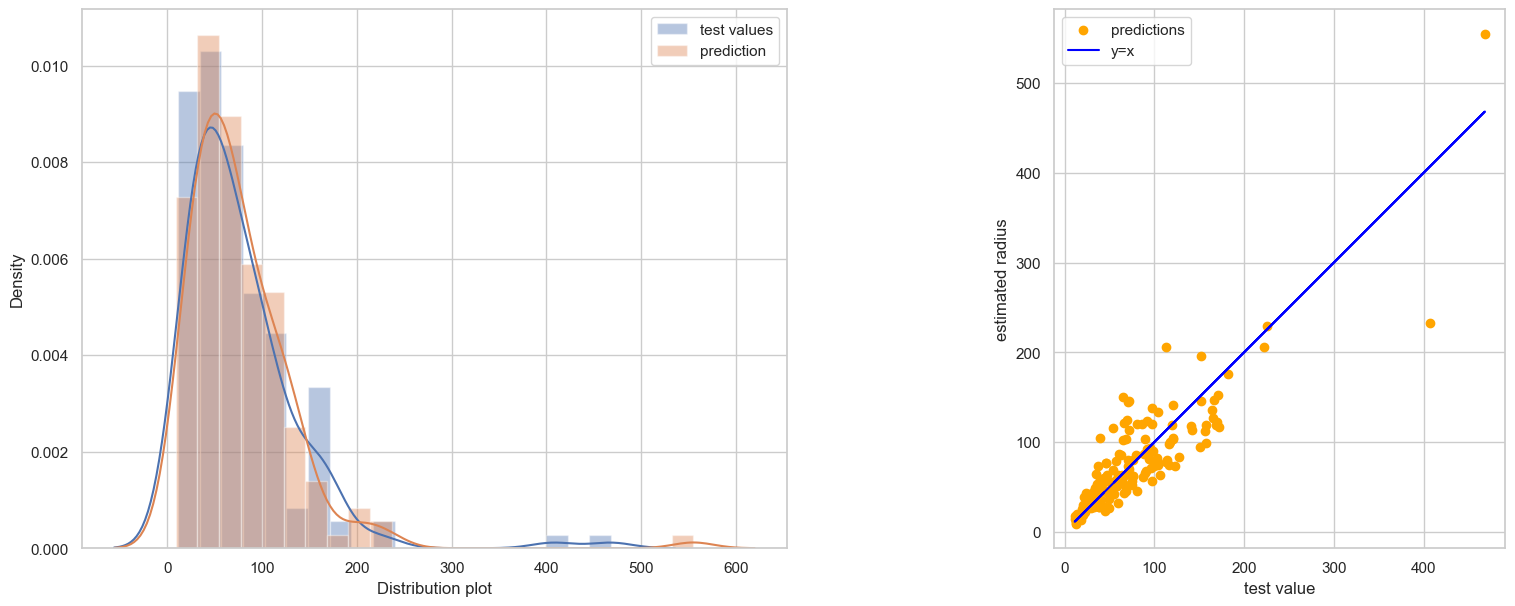

In [88]:
plot(y_test_pred)

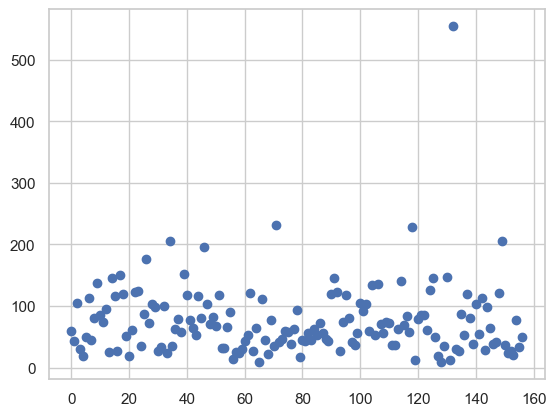

In [89]:
plt.scatter(range(y_test_pred.shape[0]), y_test_pred)

<h3> L'ANALYSE DE NOTRE MODÈLE FINAL

<BarContainer object of 6 artists>

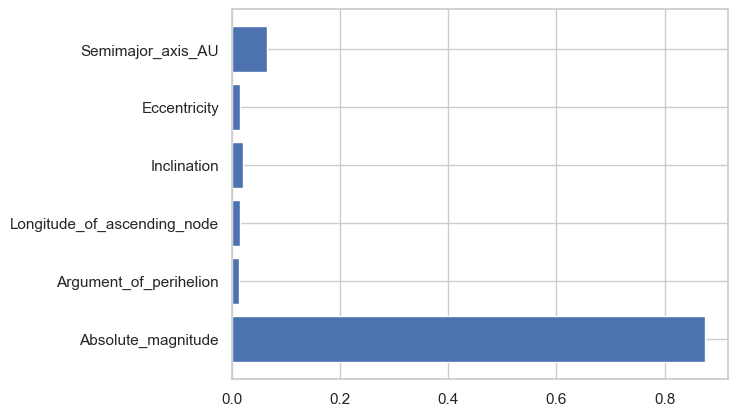

In [90]:
#L'importance des caractéristiques de la forêt aléatoire peut être comparée à la méthode Ridge ci-dessus
plt.barh(column_name, rff.feature_importances_)

<h3> Entraîner le modèle avec l'ensemble des données et prédire les résultats finaux

Auparavant, l'ensemble d'entraînement a été divisé en huit et deux pour tester les performances du modèle, mais la comparaison montre maintenant que le modèle Senri aléatoire a les meilleures performances, de sorte que le Senri aléatoire a été choisi pour s'entraîner sur l'ensemble des données et prédire ensuite le résultat final.

In [91]:
X_data = np.vstack([X_train_numerical, X_test_numerical])
rff=RandomForestRegressor(n_estimators=20,min_samples_split=15,min_samples_leaf=1)
rff.fit(X_data, Y.values)
y_train_pred=rff.predict(X_data)
y_train_pred=y_train_pred.ravel()
y_train=Y.values.ravel()
print("L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle Random Forest est {}.".format(mean_absolute_error(y_train,y_train_pred)))
print("Le score R2 du modèle Random Forest pour l'ensemble de données d'apprentissage est {}.".format(r2_score(y_train,y_train_pred)))

L'erreur absolue moyenne pour l'ensemble de données d'apprentissage pour le modèle Random Forest est 29.008317866683072.
Le score R2 du modèle Random Forest pour l'ensemble de données d'apprentissage est 0.4950919793835692.


### Prédire les résultats de la finale

In [92]:
data2_test_df = data2[column_name]
data2_test = data2_test_df.values

In [93]:
data2_test_norm = scaler.transform(data2_test)

In [94]:
data2_pred = rff.predict(data2_test_norm)

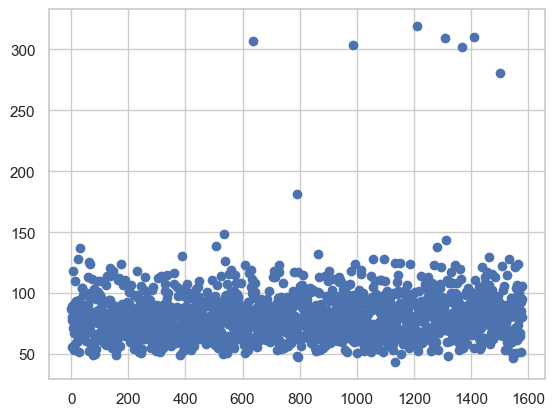

In [95]:
plt.scatter(range(data2_pred.shape[0]), data2_pred)

La prédiction finale est data2_pred.

In [96]:
data2_pred

array([ 87.2266809 ,  89.88086382,  55.75167828, ..., 105.74481097,
        80.58448067,  95.01118453])

Enfin, nous enregistrons les prédictions dans un fichier appelé data2_diameter_pred.csv et nous le stockons à la racine du carnet de notes.

In [97]:
pred_se = pd.Series(data2_pred)
pred_se.name = 'Diameter_km'
pred_se.to_csv('./data2_diameter_pred.csv', index=False)